===============================================================================
# Prediction of observed spectra including the units
===============================================================================
- author           : Sylvie Dagoret-Campagne
- date of creation : July 10th 2016

# Introduction
-----------------------

The purpose of this note is to explain the order of magnitude, the shape according wavelength units of the signal recorded in Monocam images in photometry as well as in spectrometry.
We start from the CALSPEC predicted spectra and going through the different stages of light propagation through the
atmosphere, the telescop optics, the grating and finally the CCD and the electronics (electronic readout and digitization). 


# import the packages
---------------------------------

In [1]:
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from astropy.io import fits
import astropy.units as u
from astropy.constants import e,m_e,c,eps0,mu0
import math as m

# Definition of some usefull constants

In [3]:
index=107   # index of the image spectra selected 

In [4]:
obj_name='hd158485'
airmass='1.1'
night_name='20160511'

In [5]:
path_sed='../../SED'  # path for the table of the predicted SED

In [6]:
tablefitsfile='SEDPred_'+obj_name+'_'+night_name+'_'+str(index)+'.fits'    # base filename to open

In [7]:
fullfilename=os.path.join(path_sed,tablefitsfile)  # full filename

In [8]:
print fullfilename

../../SED/SEDPred_hd158485_20160511_107.fits


# Shows the spectral energy densities prediction

In [9]:
hdulist=fits.open(fullfilename)        # open the file
hdulist.info()                         # quick outlook of the file contend

Filename: ../../SED/SEDPred_hd158485_20160511_107.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       7   ()              
1                BinTableHDU     18   3729R x 5C   [E, E, E, E, E]   


In [10]:
header=hdulist[0].header               # overview of the primary header

In [11]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
OBJ_NAME= 'hd158485'                                                            
UNITS   = 'wavelength in nm'                                                    
COMMENT Prediction of observable SED                                            

In [12]:
table_data=hdulist[1].data            # retrieve the data table

In [13]:
wavelength_sed=table_data.field('WAVELENGTH')   # the the columns of the table
flux_sed=table_data.field('SEDcalspec')
flux_sedccd=table_data.field('SEDxQE')
flux_sedccdatm=table_data.field('SEDxQExATM')
flux_sedccdatmopt=table_data.field('SEDxQExATMxTopt')

In [14]:
# rename
SED1=flux_sed             # SED of the star
SED2=flux_sedccd          # SED of star multipled by CCD efficiency 
SED3=flux_sedccdatm       # SED of star multipled by CCD efficiency and atmosphere transparency
SED4=flux_sedccdatmopt    # SED of star multipled by CCD efficiency,atmosphere transparency,
                          # optic throuput

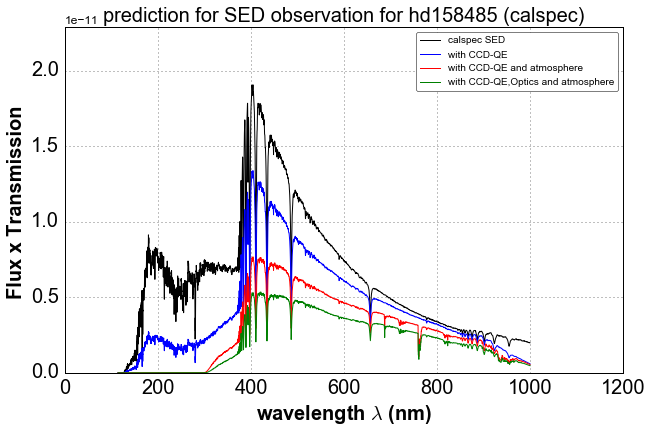

In [15]:
plt.figure(figsize=(10,06))
plt.plot(wavelength_sed,SED1,label='calspec SED',color='k')
plt.plot(wavelength_sed,SED2,label='with CCD-QE',color='b')
plt.plot(wavelength_sed,SED3,label='with CCD-QE and atmosphere',color='r')
plt.plot(wavelength_sed,SED4,label='with CCD-QE,Optics and atmosphere',color='g')
plt.xlim(0,1200.)
plt.ylim(0,SED1.max()*1.2)
plt.title('prediction for SED observation for hd158485 (calspec)',fontsize=20)
plt.xlabel('wavelength $\lambda$ (nm)',fontsize=20)
plt.ylabel('Flux x Transmission ',fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=10)
plt.show()

##  SED Spectrum

#### From the header :

** HISTORY Units : Angstroms(A) and erg s-1 cm-2 A-1 **


- This means the input spectrum is a Spectral Energy Density (SED) written as $S_{\lambda}^{E}(\lambda)$ (The E in the superscript refers to the energy or power distribution which is not the number of photons distribution).
However the CCD make some measurement of the number of photo-electrons $n_{e}(\lambda)d\lambda$ (number of photo-electrons per second in $d\lambda$ unit wavelength)
or number of photons $n_{\gamma}(\lambda)d\lambda$ (number of photons per second in $d\lambda$ unit wavelength)

The relation between the number of electrons $\delta N_{e} =  n_{e}(\lambda) \cdot d\lambda$, the number of photons  $\delta N_{\gamma} =  n_{\gamma}(\lambda) \cdot d\lambda$ and the ADU count numbers $\delta N_{ADU} =  n_{ADU}(\lambda) \cdot d\lambda$ (CCD signal digitization units) in wavelength unit $d\lambda$ per unit of time $dt$ (one second) is:

$$
n_{e}(\lambda) \cdot d\lambda =\epsilon_{CCD}(\lambda)\cdot n_{\gamma}(\lambda) \cdot d\lambda = g_{el} \cdot n_{ADU}(\lambda) \cdot d\lambda
$$

where

- $\epsilon_{CCD}(\lambda)$ : CCD quantum efficiency, no unit,
- $g_{el}$ : electronic gain used to convert ADU into electrons, unit of electron per ADU,
- $n_{e}(\lambda)$ : number of electrons in a pixel per wavelength unit $d\lambda$ and per time unit $dt$,
- $S_{\lambda}^{E}(\lambda)$ SED : energy per wavelength unit, collection surface unit, detection time unit (exposure), and wavelength unit (in present CALSEC case, erg per cm$^2$ per second per Angstrom). 

## Spectrum in photon unit

- The CCD measures a number of photons that induce photoelectrons, not the incident energy. Thus we have to convert
the spectral energy density of the source $S^E_{\lambda} (\lambda) \cdot d\lambda$ into a number of photon energy density
$S^{N_\gamma}_{\lambda}(\lambda) \cdot d\lambda$ :

$$
S^{N_\gamma}_{\lambda} (\lambda) \cdot d\lambda = \frac{S^E_{\lambda}(\lambda) \cdot d\lambda}{hc/\lambda}
$$

- The number of photons density from the source is then expressed as $dN_{\gamma}(\lambda)/d\lambda$ :

$$
\frac{dN_{\gamma}(\lambda)}{d\lambda} = S^{N_\gamma}_{\lambda}(\lambda) = \frac{\lambda }{hc} \cdot S^E_{\lambda} (\lambda)
$$



- Note in some textbook, the spectral energy density $S^{E}_\nu (\nu)$ is tabulated in frequency unit.

Given 
$$ dE = S^{E}_\nu (\nu) \cdot d\nu  =   S^{E}_\lambda (\lambda) \cdot d\lambda
$$

$$
S^{E}_\lambda (\lambda) = S^{E}_\nu (\nu) \cdot | \frac{d\nu}{d\lambda} | = \frac{c}{\lambda^2} \cdot S^{E}_\nu (\nu)
$$

thus we can also find the expression for the number of photons in the detector:

$$
\frac{dN_{\gamma}(\lambda)}{d\lambda} = \frac{1 }{h \lambda} \cdot S^E_{\nu} (\nu(\lambda))
$$

Or if we wanted to express $dN_{\gamma}(\lambda)$ as a function of $\nu$ :

$$
dN_{\gamma}(\nu) = dN_{\gamma}(\lambda)\cdot |\frac{d\lambda}{d\nu}|= \frac{c}{\nu^2}\cdot dN_{\gamma}(\lambda)
$$



... to be continued to show:



# The flux in a wavelength bandwidth

Transmission in atmosphere $T^{atm}(\lambda)$ , detector filters $T^{filt}(\lambda)$, or grating $T^{grat}(\lambda)$,  optics (mirrors and lenses) $T^{opt}(\lambda)$, detector (CCD) $\epsilon_{CCD}(\lambda)$, focusing efficiency $\epsilon_{PSF}$ are often expressed as a function of the wavelength $\lambda$ and the SED either using $S^{E}_\lambda(\lambda)$ or using $S^{E}_\nu(\nu(\lambda))$: 

The flux (in ADU) in a pixel in $\Delta \lambda$ is expressed as:

$$
F_{\Delta \lambda}^{ADU} = \frac{\pi D^2}{4 g_{el}} \int_{\Delta \lambda}  T^{atm}(\lambda) \cdot T^{grat}(\lambda) \cdot T^{opt}(\lambda) \cdot \epsilon_{PSF} \cdot \epsilon_{CCD}(\lambda) \cdot \frac{dN_{\gamma} (\lambda)}{d\lambda} \cdot d\lambda
$$

$$
F_{\Delta \lambda}^{ADU} = \frac{\pi D^2}{4 g_{el} h c} \int_{\Delta \lambda}  T^{atm}(\lambda) \cdot T^{grat}(\lambda) \cdot T^{opt}(\lambda) \cdot \epsilon_{PSF} \cdot \epsilon_{CCD}(\lambda) \cdot  S^{E}_\lambda(\lambda)    \cdot \lambda \cdot d\lambda
$$

$$
F_{\Delta \lambda}^{ADU} = \frac{\pi D^2}{4 g_{el} h} \int_{\Delta \lambda}  T^{atm}(\lambda) \cdot T^{grat}(\lambda) \cdot T^{opt}(\lambda) \cdot \epsilon_{PSF} \cdot \epsilon_{CCD}(\lambda) \cdot  S^{E}_\nu(\lambda)   \cdot \frac{d\lambda}{\lambda}
$$


### remarks

- we should not forget the $\lambda$ term,
- we should not forget the $T^{grat}(\lambda)$ term. I would guess the following approximation $T^{grat}(\lambda)\propto 1/\lambda^\alpha$ ($\alpha$ is an unknown index power) and that the term $\lambda \cdot T^{grat}(\lambda)$ is quite constant from 600 nm to 1000 nm in our case.
- $\epsilon_{PSF}$ : If the maximum of light goes in the considered pixel, the light focusing also called PSF (standing for Point Spread Function) is shared among several neighboring pixels. We call $\epsilon_{PSF}$ the fraction of the signal going into the hottest pixel.

# Checking the order of magnitudes , the constants and the units for Monocam

In [16]:
from astropy.constants import c,h

In [17]:
SED_400nm=2*10**(-11)*u.erg/u.s/((u.cm))**2/u.angstrom   # Spectral Energy Density provided by Calspec

In [18]:
D=1.3*u.m      # radius of the telescpe

In [19]:
d_PSF=3        # 1 sigma extension of the PSF in pixel unit

In [20]:
Pixel_to_Wavelength=0.566*u.nm   # slope of the calibration curve

In [21]:
d_wl=Pixel_to_Wavelength*d_PSF   # resolution (accuracy) in wavelength of the spectrometer (PSF effect)

In [22]:
# some reasonable guess
Tatm=0.7  # at 400 nm
Tgrat=0.01 # guess ?
Topt=0.7 # at 400 nm
Epsf=0.5  # quick guess
Eccd=0.7*u.electron  # at 400nm
gel=3.7*u.electron/u.adu  # electronic gain that I know from A. Numerovski

In [23]:
wl=400.*u.nm

#### Calculate the expected flux in Monocam data for the grating

In [24]:
F=np.pi*D**2/gel/h/c*SED_400nm*wl*d_wl*Tatm*Tgrat*Topt*Epsf*Eccd

In [25]:
F.decompose()  # we have the right units , and the right order of magnitude also

<Quantity 1682.8676274101517 adu / s>

### Remarks

- We had to suppose the first order spectrum get 1% of the total signal.
This has to be confirmed.

